In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [4]:
# check for missing data

In [5]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

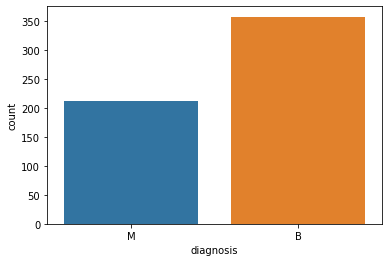

In [7]:
sns.countplot(x='diagnosis', data=df)

In [8]:
# replace categorical values with numbers

In [9]:
print('Distribution of data: ', df['diagnosis'].value_counts())

Distribution of data:  B    357
M    212
Name: diagnosis, dtype: int64


In [10]:
# define the dependent variable that needs to be predicted (diagnosis)

In [11]:
y = df['diagnosis'].values

In [12]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [13]:
print('Labels before encoding are: ', np.unique(y))

Labels before encoding are:  ['B' 'M']


In [14]:
# encoding categorical data from text (B, M) to integers (0, 1)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
Y = le.fit_transform(y)

In [18]:
print('Labels after encoding are: ', np.unique(Y))

Labels after encoding are:  [0 1]


In [19]:
# define and normalize/scale values

In [31]:
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

In [35]:
print(X.describe().T) #needs scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [36]:
# X needs scalling, bring everything in the same range

In [38]:
# scale/normalize the values to bring them to similar range

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [42]:
print(X) 

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [44]:
# split data into training and testing to verify accuracy after fitting the model

In [45]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)

In [53]:
# check the shape of the traing and testing data
print('Shape of training data is: ', X_train.shape) 
print('Shape of testing data is: ', X_test.shape)

Shape of training data is:  (512, 30)
Shape of testing data is:  (57, 30)


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [58]:
# defining the model
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                496       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
# fit the model with no-early stopping or other callbacks
# history is a dictionary to capture the loss and accuracy scores so i can plot later on
history = model.fit(X_train, Y_train, verbose=1, epochs=100, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100
8/8 [==============================] - 1s 19ms/step - loss: 0.6828 - accuracy: 0.5996 - val_loss: 0.6474 - val_accuracy: 0.7018
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.6348 - val_loss: 0.6323 - val_accuracy: 0.7368
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6584 - accuracy: 0.6816 - val_loss: 0.6176 - val_accuracy: 0.8246
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6455 - accuracy: 0.6855 - val_loss: 0.6031 - val_accuracy: 0.8772
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6341 - accuracy: 0.7383 - val_loss: 0.5898 - val_accuracy: 0.8772
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6186 - accuracy: 0.7754 - val_loss: 0.5761 - val_accuracy: 0.9123
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6074 - accuracy: 0.7969 - val_loss: 0.5613 - val_accuracy: 0.9123
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.2104 - accuracy: 0.9238 - val_loss: 0.1465 - val_accuracy: 0.9474
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2030 - accuracy: 0.9277 - val_loss: 0.1444 - val_accuracy: 0.9474
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1957 - accuracy: 0.9355 - val_loss: 0.1432 - val_accuracy: 0.9474
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2030 - accuracy: 0.9121 - val_loss: 0.1413 - val_accuracy: 0.9474
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9434 - val_loss: 0.1395 - val_accuracy: 0.9474
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1977 - accuracy: 0.9277 - val_loss: 0.1377 - val_accuracy: 0.9474
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1919 - accuracy: 0.9297 - val_loss: 0.1362 - val_accuracy: 0.9474
Epoch 66/100
8/8 [===============

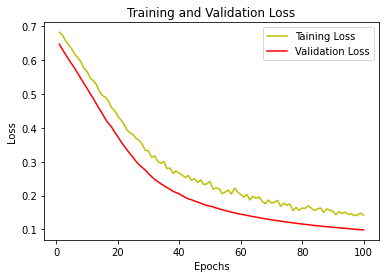

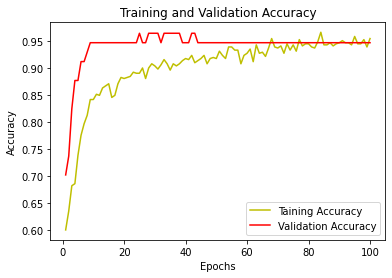

In [71]:
# plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Taining Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Taining Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()